# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Importamos-librerias-que-vamos-a-usar" data-toc-modified-id="Importamos-librerias-que-vamos-a-usar-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importamos librerias que vamos a usar</a></div><div class="lev1 toc-item"><a href="#Un-primer-ejemplo---Agrupamiento-/-Clustering" data-toc-modified-id="Un-primer-ejemplo---Agrupamiento-/-Clustering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Un primer ejemplo - Agrupamiento / <em>Clustering</em></a></div><div class="lev2 toc-item"><a href="#Generamos-datos-aleatorios" data-toc-modified-id="Generamos-datos-aleatorios-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generamos datos aleatorios</a></div><div class="lev2 toc-item"><a href="#Hacemos-el-agrupamiento" data-toc-modified-id="Hacemos-el-agrupamiento-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Hacemos el agrupamiento</a></div><div class="lev2 toc-item"><a href="#Es-un-problema-muy-general!" data-toc-modified-id="Es-un-problema-muy-general!-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Es un problema muy general!</a></div><div class="lev1 toc-item"><a href="#Aprendizaje-automatico-y-visualizacion" data-toc-modified-id="Aprendizaje-automatico-y-visualizacion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Aprendizaje automatico y visualizacion</a></div><div class="lev1 toc-item"><a href="#El-problema-del-sobreajuste" data-toc-modified-id="El-problema-del-sobreajuste-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>El problema del sobreajuste</a></div><div class="lev2 toc-item"><a href="#Dividimos-en-TRAIN-y-TEST" data-toc-modified-id="Dividimos-en-TRAIN-y-TEST-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dividimos en TRAIN y TEST</a></div><div class="lev1 toc-item"><a href="#Ejercicio" data-toc-modified-id="Ejercicio-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ejercicio</a></div><div class="lev1 toc-item"><a href="#Machete" data-toc-modified-id="Machete-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Machete</a></div>

# Importamos librerias que vamos a usar

In [1]:
#from __future__ import unicode_literals
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns
#print("Soy un notebook que funciona!")

# Un primer ejemplo - Agrupamiento / _Clustering_

## Generamos datos aleatorios

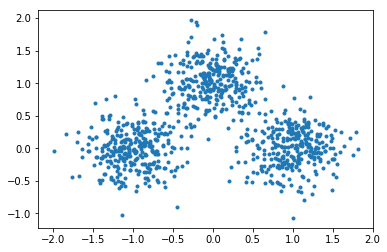

In [2]:
# Generamos 3 grupos de datos distintos
# Definimos 3 centros:
centros = ((-1, 0), (1, 0), (0, 1))

Npuntos = 300
Ngrupos = len(centros)
todos_juntos = []
for centro in centros:
    x = np.random.randn(Npuntos)*0.3 + centro[0]
    y = np.random.randn(Npuntos)*0.3 + centro[1]
    puntos = np.vstack((x,y)).T
    todos_juntos.append(puntos)
todos_juntos = np.vstack(todos_juntos)
plt.plot(todos_juntos[:,0], todos_juntos[:,1],'.')



## Hacemos el agrupamiento

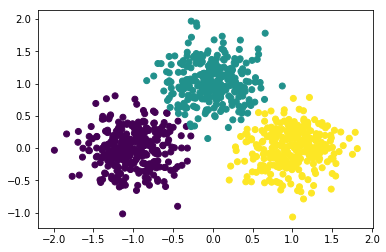

In [6]:
# Clustering
from sklearn.cluster import MeanShift, KMeans

#ms = MeanShift(bandwidth=0.5)
ms = KMeans(3)
ms.fit(todos_juntos)

plt.scatter(todos_juntos[:,0], todos_juntos[:,1], c=ms.labels_)


## Es un problema muy general!

Vamos a aplicar estas mismas ideas a palabras usando vectores de textos entrenados con [fasttext](https://github.com/facebookresearch/fastText). Para poder correr este ejemplo tiene que descargar el archivo de vectores que esta aca https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.es.vec y guardarlo en la carpeta de esta clase

In [29]:
# Cargamos los vectores de algunas palabras

text_vec_file = './wiki.es.vec'
target_words = ['gato', 'perro', 'pato', 'vaca', 'caballo', 'gallina', 'lobo', 'liebre', 'conejo', 'ballena',
                'libro', 'papel', 'lapicera', 'imprenta', 'computadora', 'teléfono', 'letras', 'correo', 'carta',
                'banana', 'pera', 'manzana', 'naranja', 'uva', 'cereza', 'limón', 'ananá', 'sandía', 'kiwi']
good_lines = []
counter = 0
with open(text_vec_file, 'r') as f:
    for line in f:
        counter += 1
        line_list = line.split(' ')
        if counter % 100000 == 0:
            print("va {:1.2f}%".format(float(counter)/985668*100))
        if line_list[0] in target_words:
            good_lines.append(line_list)

va 10.15%
va 20.29%
va 30.44%
va 40.58%
va 50.73%
va 60.87%
va 71.02%
va 81.16%
va 91.31%


In [30]:
from sklearn.cluster import KMeans # Otro algoritmo de clustering

# Lo usamos para ponerle color a las palabras
from IPython.display import HTML as html_print 
def cstr(s, color='black'):
    return "<text style=color:{}>{}</text>".format(color, s)

good_lines = np.random.permutation(good_lines) # Mezclamos las palabras solo para que se vea mas impresionante

palabras = [g[0] for g in good_lines]
vectores = np.vstack([g[1:-1] for g in good_lines]).astype(float)
km = KMeans(n_clusters=3)
km.fit(vectores)

colores = ['red', 'green', 'blue']

print_strings = ''
for p, l in zip(palabras, km.labels_):
    print_strings = print_strings + cstr(p, colores[l]) + '<br>'
html_print(print_strings)

# Aprendizaje automatico y visualizacion
¿Podemos ver de alguna manera espacios de muchas dimensiones?

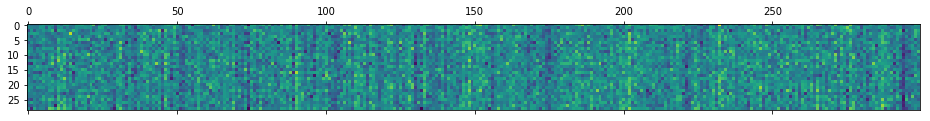

In [32]:
# Vemos los vectores de cada palabra (tienen 300 dimensiones!)
plt.matshow(vectores)
plt.grid(False)

In [36]:
vectores[1,:]

array([-0.028103 , -0.036773 , -0.087184 , -0.11262  ,  0.14698  ,
        0.10896  , -0.38912  ,  0.19277  , -0.068465 , -0.51539  ,
        0.061505 ,  0.091861 , -0.27444  , -0.026186 , -0.24746  ,
       -0.10637  ,  0.11567  ,  0.04206  ,  0.063548 ,  0.13664  ,
        0.06785  ,  0.1434   , -0.21262  , -0.20036  ,  0.32318  ,
        0.23899  , -0.22856  ,  0.01953  , -0.097389 , -0.12644  ,
       -0.022653 , -0.06344  ,  0.18249  , -0.52702  ,  0.22303  ,
       -0.15045  , -0.65471  ,  0.053209 , -0.092657 ,  0.018467 ,
        0.16452  ,  0.0082877, -0.32845  , -0.13442  , -0.13809  ,
        0.013399 ,  0.090886 ,  0.060001 , -0.025255 ,  0.51791  ,
        0.053119 , -0.067074 , -0.49693  , -0.24255  ,  0.30623  ,
        0.091413 , -0.12883  , -0.079953 , -0.20137  , -0.20781  ,
        0.097905 , -0.19768  , -0.079902 , -0.076853 ,  0.33704  ,
       -0.35557  , -0.21873  ,  0.22069  , -0.17415  ,  0.03051  ,
       -0.11041  , -0.045176 , -0.23117  ,  0.42148  , -0.0397

([], <a list of 0 Text yticklabel objects>)

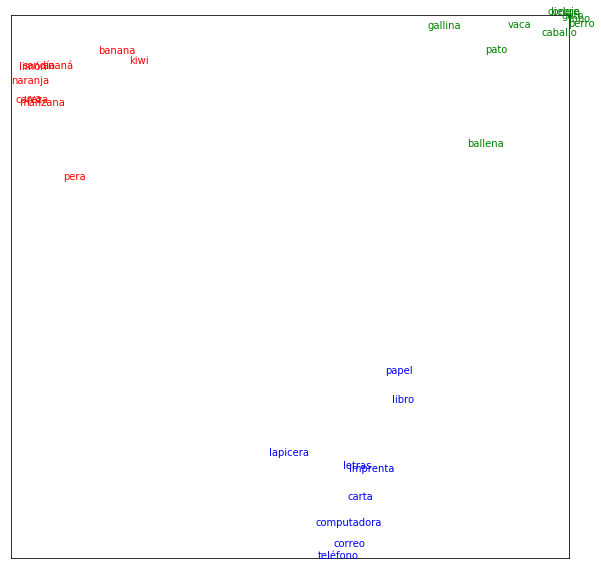

In [35]:
from sklearn.manifold import MDS, SpectralEmbedding, LocallyLinearEmbedding
plt.figure(figsize=(10,10))
proyector = LocallyLinearEmbedding()
X = proyector.fit_transform(vectores)
for coords, pal, cat in zip(X, palabras, km.labels_):
    plt.text(coords[0], coords[1], pal,color=colores[cat])
plt.xlim(np.amin(X[:,0]),np.amax(X[:,0]))
plt.ylim(np.amin(X[:,1]),np.amax(X[:,1]))
plt.xticks([])
plt.yticks([])


# El problema del sobreajuste

Existen dos estrategias para atacar este problema.

- Penalizar modelos con muchos parámetros (no lo vemos aca) ver https://en.wikipedia.org/wiki/Bayesian_information_criterion 
- Dividir en TRAIN y TEST 

([], <a list of 0 Text yticklabel objects>)

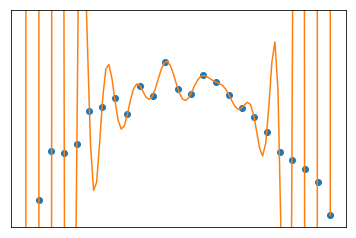

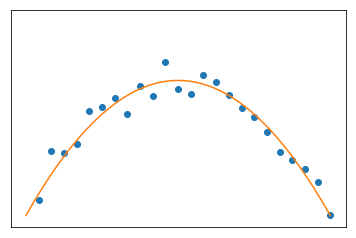

In [7]:
# Ejemplo de lo que queremos hacer

# Datos falsos
Npoints=25
x = np.linspace(-1,1,Npoints)
y = -x**2 + 1 + np.random.randn(len(x))*0.1

# Un ajuste con Npoint parametros
xx = np.linspace(-1,1,100)
pp = np.polyfit(x, y, Npoints-1)
yy = np.polyval(pp, xx)
plt.plot(x,y,'o',xx,yy)
plt.xlim((-1.1,1.1))
plt.ylim((-0.1,1.5))
plt.xticks([])
plt.yticks([])
plt.figure()

# Un ajuste con 2 parametros
xx = np.linspace(-1,1,100)
pp = np.polyfit(x,y,2)
yy = np.polyval(pp, xx)
plt.plot(x,y,'o',xx,yy)
plt.xlim((-1.1,1.1))
plt.ylim((-0.1,1.5))
plt.xticks([])
plt.yticks([])


## Dividimos en TRAIN y TEST

La estrategia es la siguiente dividimos a los datos en dos grupos TRAIN y TEST
Entrenamos un modelo con 1, 2, 3, 4 .... parametros y nos fijamos cuan bien se ajusta el modelo pero en los datos ¡TEST! (ese es el punto importante). 

Vemos que el ajuste va mejorando a medida que agregamos parametros pero despues de 2 el error empieza a subir (porque estamos sobreajustando). Entonces el mejor modelo es el de 2 parametros! 

Text(0, 0.5, 'LOG(error)')

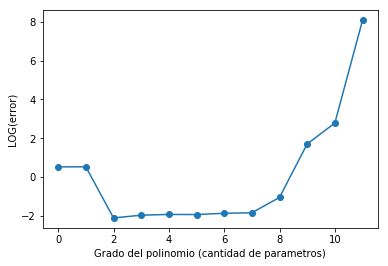

In [8]:
i_test = np.arange(0,len(x),2)
i_train = np.arange(1,len(x),2)

errores = []
for grado in range(len(i_train)):
    pp = np.polyfit(x[i_train], y[i_train], grado)
    y_estimado = np.polyval(pp, x[i_test])
    error = np.sum((y[i_test] - y_estimado)**2)
    errores.append(error)
plt.plot(np.log(errores),'o-') # Vemos que el mejor valor es 2 (escala logartimica)
plt.xlabel('Grado del polinomio (cantidad de parametros)')
plt.ylabel('LOG(error)')

# Ejercicio

# Machete 
<img src="http://scikit-learn.org/stable/_static/ml_map.png">